# Run network creation in parallel.

Please first start ```ipcluster```, on linux you type the following into the terminal, note that you should be in the ```Snudda/examples/notebook``` directory:

```
export IPYTHONDIR="`pwd`/.ipython"
export IPYTHON_PROFILE=default
ipcluster start 
```

These commands are in ```start_ipcluster.sh``` in the ```examples/notebook``` directory. After starting ipcluster give it a few seconds to get fully up and running before proceeding with the rest of the commands in this notebook. 

If you restart the run you might need to do:

```
ipcluster stop
ipcluster start
```

For instructions how to install and activate ipyparallel for your notebook see 
https://github.com/ipython/ipyparallel


The instructions above are created on Linux. If you run on **Windows** and do not get the environment variables to work for ipcluster, then you might need to update ```IPYTHONDIR``` in cell 1, and ```u_file``` in cell 3 to point to the location that ipcluster writes the pid file to.

In [1]:
import os
from snudda import SnuddaInit

network_path = os.path.join("networks","simple_example_parallel")
si = SnuddaInit(struct_def={}, network_path=network_path, random_seed=123)
si.define_striatum(num_dSPN=200, num_iSPN=200, num_FS=4, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neurons_dir="$DATA/neurons")
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Writing networks/simple_example_parallel/network-config.json


In [2]:
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(os.getcwd(), ".ipython", "profile_default", "security", 
                      "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

Passing valid rc parameter to SnuddaDetect will lead to parallel execution.
When we use network_path as parameter we assume the config file is located in that directory and that it is named ```network-config.json```

In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, rc=rc)
sp.place()

Reading SNUDDA_DATA=None from networks/simple_example_parallel/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc)
sd.detect()

Reading SNUDDA_DATA=None from networks/simple_example_parallel/network-config.json
importing SnuddaDetect from snudda.detect.detect on engine(s)
importing ProjectionDetection from snudda.detect.projection_detection on engine(s)
Suppressing printouts for hyper voxels that complete in < 100 seconds.


In the folder ```networks/simple_example_parallel/log/``` you can find log files for touch detection. The file ```touch-detection.txt``` is the master node log, and the files ```touch-detection.txt-0``` up to ```n``` are the different worker logs where you can see what they are doing, since they do not print their output to stdout.

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc)
sp.prune()

importing SnuddaPrune from snudda.detect.prune on engine(s)
prune_synapses_parallel (86079/1624404 synapses, 5.3% kept): 2.6s
prune_synapses_parallel (7/42 gapJunctions, 16.7% kept): 0.1s


Loading 404 neurons with 86079 synapses and 7 gap junctions
Reading SNUDDA_DATA=None from networks/simple_example_parallel/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/simple_example_parallel/network-synapses.hdf5


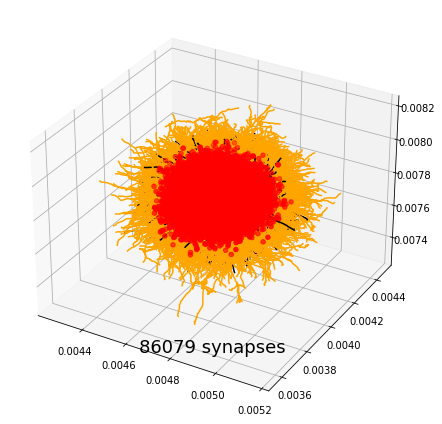

In [6]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-synapses.hdf5")
pn = PlotNetwork(network_file)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it